<a href="https://colab.research.google.com/github/rfb0408/python_data_analyst_study/blob/main/6%EC%9D%BC%EC%B0%A8_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 데이터 시각화

In [ ]:
# 시작하기 전에 파일 올리고 시작하기!

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
tips = sns.load_dataset('tips')
tips.head() # .head() 함수는 불러온 데이터의 상위 5개의 행을 출력

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### 1. 분포 그래프 (Distribution plots)
* 히스토그램 (Histogram): 팁의 분포를 보여줍니다.
* 커널 밀도 추정 (KDE): 연속적인 확률 밀도를 추정합니다.
* 누적 분포 그래프 (Cumulative Distribution Plot): 누적 데이터 분포를 보여줍니다.

In [6]:
tips['total_bill']

0      16.99
1      10.34
2      21.01
3      23.68
4      24.59
       ...  
239    29.03
240    27.18
241    22.67
242    17.82
243    18.78
Name: total_bill, Length: 244, dtype: float64

<Axes: xlabel='total_bill', ylabel='Count'>

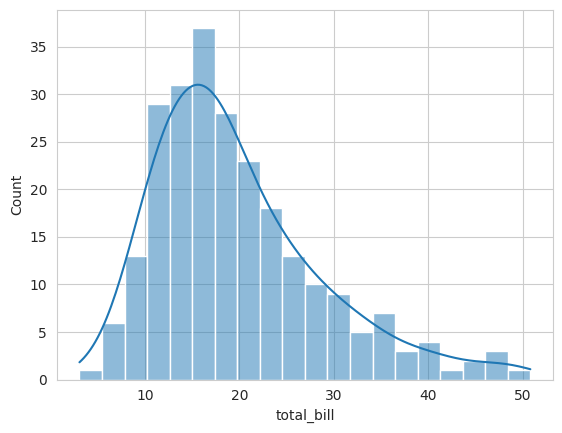

In [7]:
# 단변량 그래프
sns.set_style("whitegrid") # 스타일은 darkgrid, whitegrid, dark, white 설정 가능
sns.histplot(tips['total_bill'],kde=True,bins=20) # 커널밀도함수 그래프 = 참, bin = 20개

<Axes: xlabel='total_bill', ylabel='Count'>

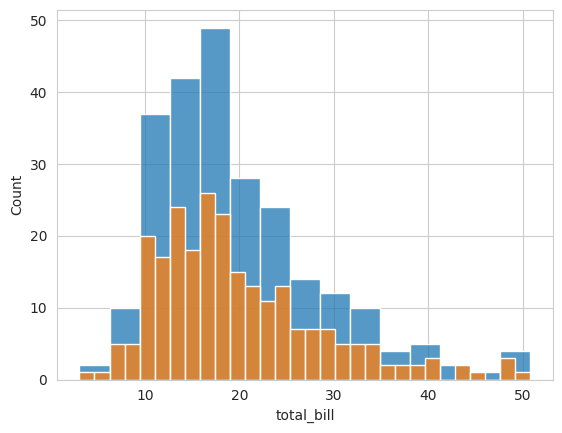

In [10]:
# 겹쳐서 표현가능
sns.histplot(data=tips,x='total_bill',bins=15)
sns.histplot(data=tips,x='total_bill',bins=30)

<Axes: xlabel='total_bill', ylabel='tip'>

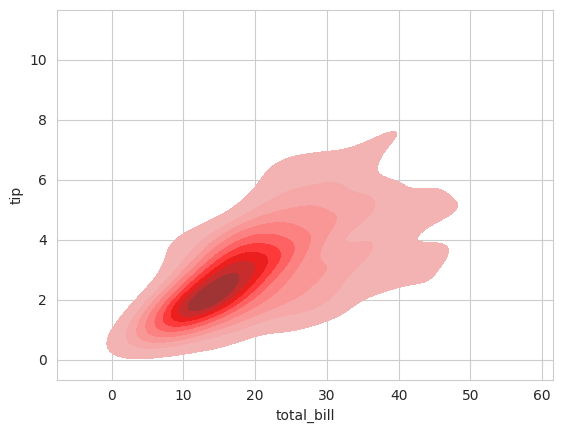

In [ ]:
# 이변량 그래프
sns.kdeplot(data=tips,x='total_bill',y='tip',fill=True,color='red')

<Axes: xlabel='total_bill', ylabel='Density'>

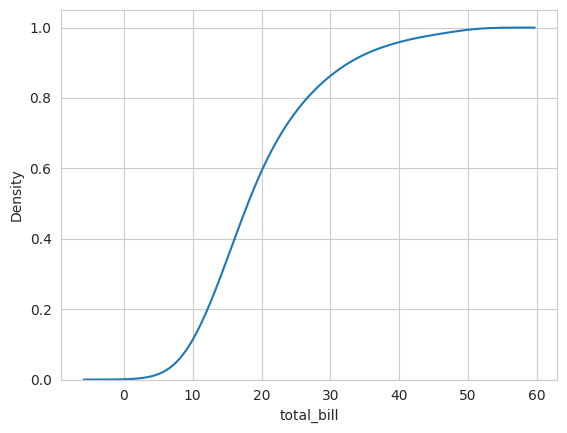

In [ ]:
# 누적분포그래프
sns.kdeplot(data=tips,x='total_bill',cumulative=True)

### 2. 범주형 데이터 시각화 (Categorical data visualization)
* 바 차트 (Bar Chart): 서로 다른 범주(예: 날짜별)의 팁 평균을 비교합니다.
* 박스 플롯 (Box Plot): 팁의 분포와 이상치를 보여줍니다.
* 바이올린 플롯 (Violin Plot): 박스 플롯과 KDE의 결합으로, 데이터 분포의 밀도와 범위를 보여줍니다.

<Axes: xlabel='day', ylabel='tip'>

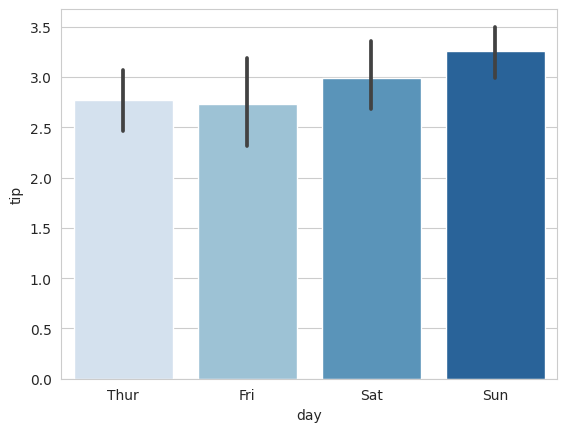

In [ ]:
# 평균 막대 그래프(주로 x축을 범주형, y축 연속형)
sns.barplot(data=tips,x='day',y='tip',palette='Blues')
# 검은선: 신뢰구간

<Axes: xlabel='day', ylabel='tip'>

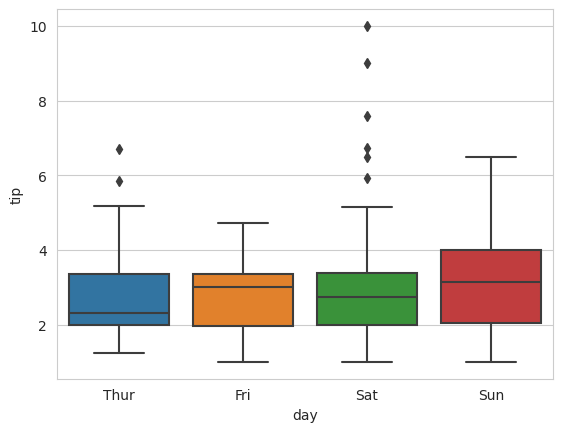

In [ ]:
# 평균, 데이터에 이상치가 있다면 평균을 믿을수가 없음
# 박스 플롯을 사용하면 이상치 확인 가능!
# x축이 범주형, y축이 연속형

sns.boxplot(data=tips,x='day',y='tip')

<Axes: xlabel='sex', ylabel='tip'>

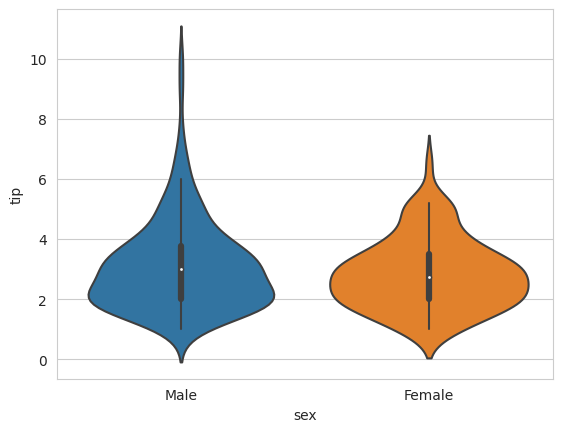

In [ ]:
sns.violinplot(data=tips,x='sex',y='tip') # 바이올린 플롯은 이상치가 몇 개 있는지 알기 어렵

<Axes: xlabel='time', ylabel='tip'>

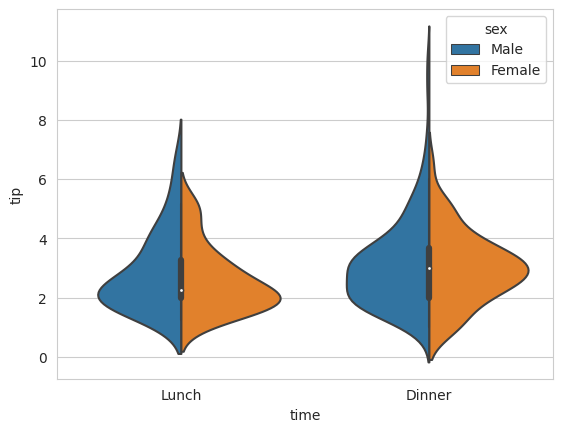

In [19]:
sns.violinplot(data=tips,x='time',y='tip',hue='sex',split=True) # 대칭이라서 반으로 잘라도 문제없

<Axes: xlabel='sex', ylabel='tip'>

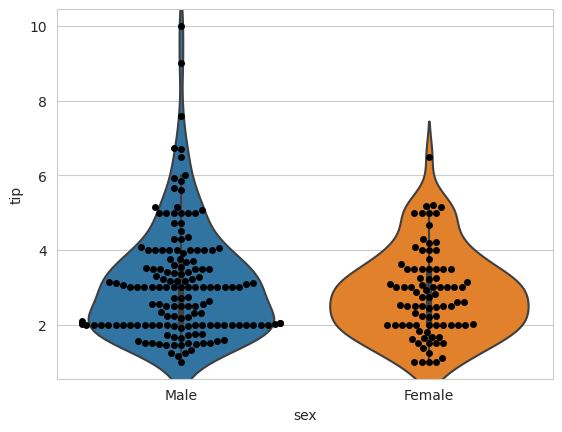

In [ ]:
# swarmplot : 점들이 겹치지 않게 표시됨
# stripplot : 점들이 겹쳐져서 표시

sns.violinplot(data=tips,x='sex',y='tip')
sns.swarmplot(data=tips,x='sex',y='tip',color='black')

### 3. 관계 그래프 (Relational plots)
* 산점도 (Scatter Plot): 두 변수 간의 관계를 보여줍니다 (예: 총 금액 대비 팁).
* 라인 플롯 (Line Plot): 시계열 데이터 또는 연속적인 데이터의 트렌드를 보여줍니다.

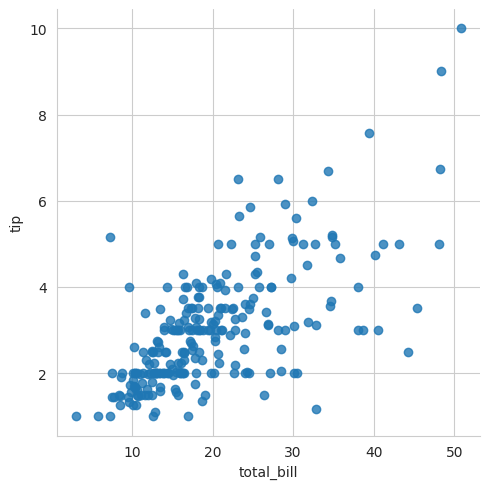

In [ ]:
sns.lmplot(data=tips,x='total_bill',y='tip',fit_reg=False) # fit_reg : 회귀선 유무

In [12]:
tips['total_bill'].corr(tips['tip']) # 'total_bill'과 'tip'의 상관관계는 높다 -> 인과관계가 높다라고 착각하면 안됨! 전혀 다른거임

0.6757341092113641

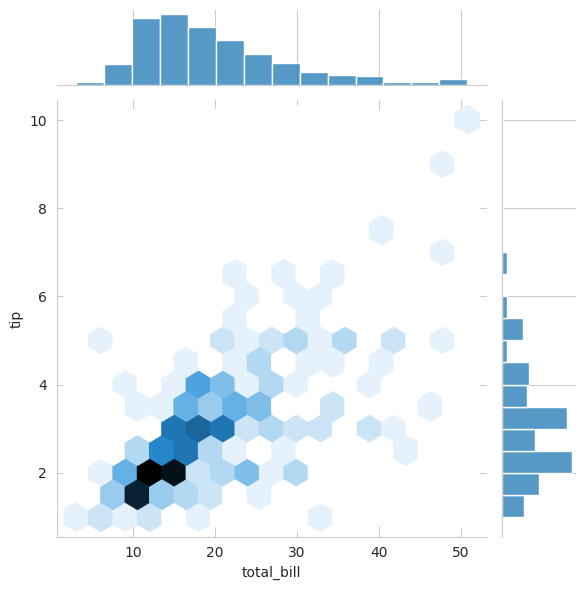

In [13]:
#히스토그램 + 산점도
sns.jointplot(data=tips,x='total_bill',y='tip',kind='hex')

<Axes: xlabel='total_bill', ylabel='tip'>

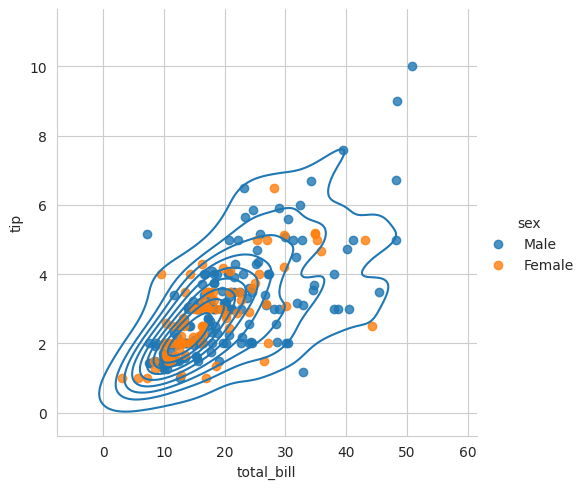

In [14]:
sns.lmplot(data=tips,x='total_bill',y='tip',fit_reg=False,hue='sex')
sns.kdeplot(data=tips,x='total_bill',y='tip')

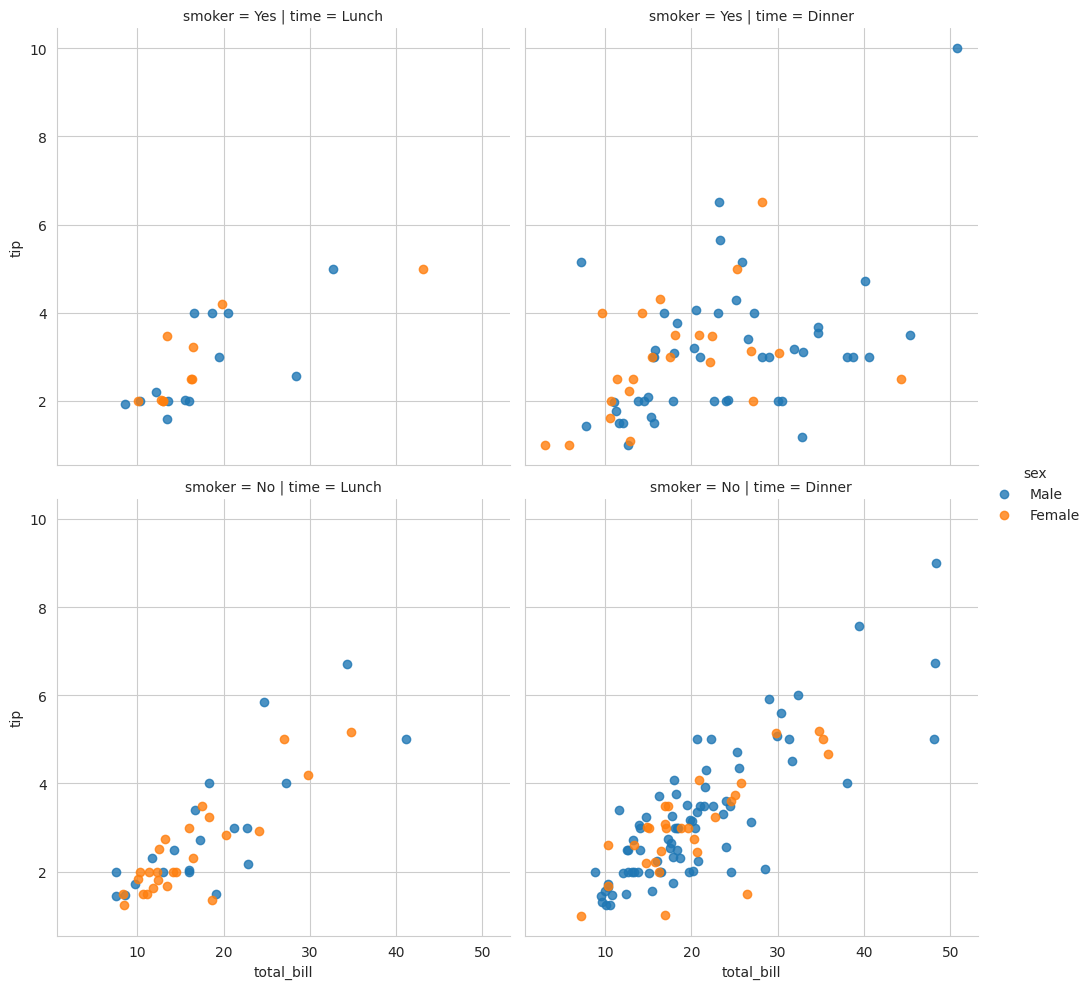

In [15]:
sns.lmplot(data=tips,x='total_bill',y='tip',fit_reg=False,hue='sex',
           col ='time',row='smoker')

### 4. 다변량 분석 (Multivariate analysis)
* 히트맵 (Heatmap): 변수 간의 상관관계를 시각적으로 표현합니다.
* 페어 플롯 (Pair Plot): 모든 수치형 변수 간의 관계를 한번에 보여줍니다.

In [ ]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


<Axes: xlabel='time', ylabel='day'>

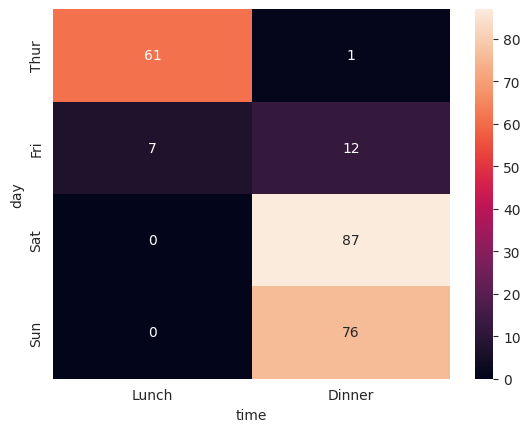

In [16]:
# 내가 원하는 행과 열을 설정해서 빈도값을 계산해주는 함수
a= pd.crosstab(index=tips['day'],columns=tips['time'])
sns.heatmap(a,annot=True)

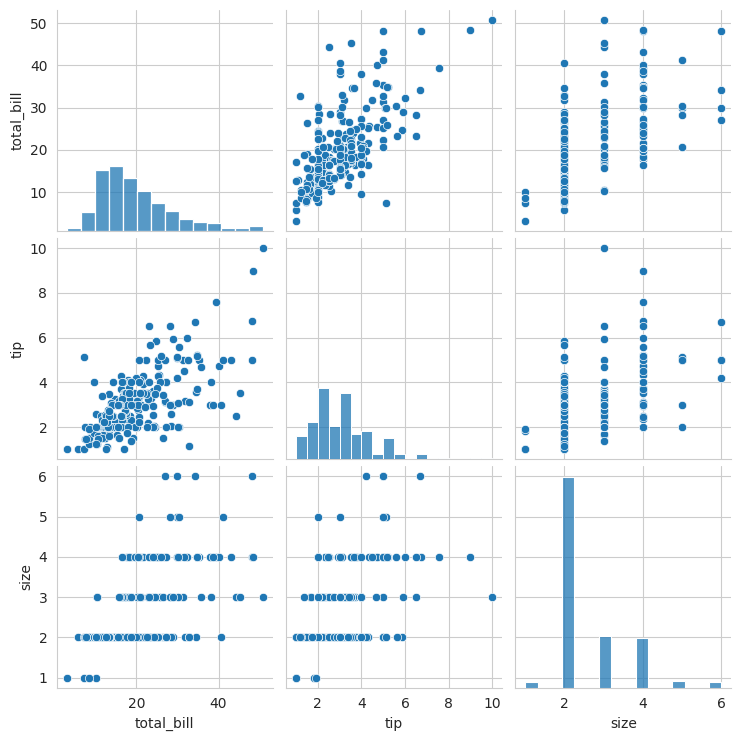

In [17]:
#산점도 행렬 : 비교할 수 있는 모든 열끼리 비교해서 산점도
sns.pairplot(tips)

### 5. 기타 그래프 (etc. )
* Countplot (카운트플롯): 범주형 데이터의 빈도수를 막대 그래프로 표시합니다.
* Swarmplot (스웜플롯): 범주형 데이터의 분포를 점으로 표시하며, 점들이 겹치지 않도록 조정됩니다.
* Stripplot (스트립플롯): Swarmplot과 유사하지만, 점들이 겹칠 수 있습니다.
* Pointplot (포인트플롯): 범주형 데이터의 중심 경향을 점과 선으로 표시합니다.

<Axes: xlabel='day', ylabel='count'>

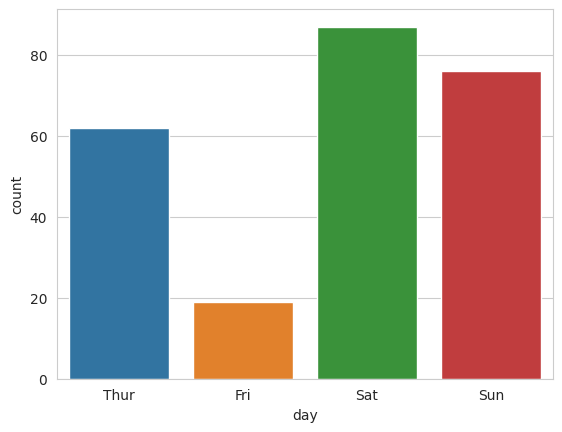

In [18]:
# 빈도 막대 그래프
sns.countplot(data=tips,x='day')

<Axes: xlabel='size', ylabel='tip'>

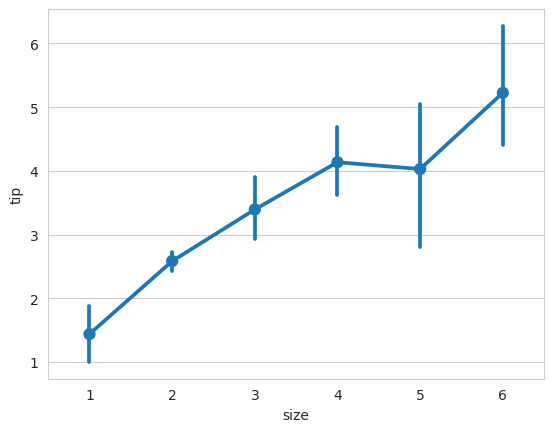

In [ ]:
sns.pointplot(data=tips,x='size',y='tip')

# 데이터 프레임 합치기

In [21]:
# 데이터프레임 합치기
df1 = pd.read_csv("/content/concat_1.csv")
df2 = pd.read_csv("/content/concat_2.csv")
df3 = pd.read_csv("/content/concat_3.csv")

In [22]:
df1

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3


In [23]:
df2

,A,B,C,D
0,a4,b4,c4,d4
1,a5,b5,c5,d5
2,a6,b6,c6,d6
3,a7,b7,c7,d7


In [24]:
df3

,A,B,C,D
0,a8,b8,c8,d8
1,a9,b9,c9,d9
2,a10,b10,c10,d10
3,a11,b11,c11,d11


In [28]:
# 합칠때 concat함수 사용. 깔끔하게 볼려면 ignore_index=True
a= pd.concat([df1,df2,df3],ignore_index=True)
a

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3
4,a4,b4,c4,d4
5,a5,b5,c5,d5
6,a6,b6,c6,d6
7,a7,b7,c7,d7
8,a8,b8,c8,d8
9,a9,b9,c9,d9


In [27]:
a= pd.concat([df1,df2,df3],axis=1)# 기본값 : 0 방향, 0이 아래방향, 1이 오른쪽 방향
a

,A,B,C,D,A,B,C,D,A,B,C,D
0,a0,b0,c0,d0,a4,b4,c4,d4,a8,b8,c8,d8
1,a1,b1,c1,d1,a5,b5,c5,d5,a9,b9,c9,d9
2,a2,b2,c2,d2,a6,b6,c6,d6,a10,b10,c10,d10
3,a3,b3,c3,d3,a7,b7,c7,d7,a11,b11,c11,d11


In [29]:
df2.columns=['A','C','E','F']
df2

,A,C,E,F
0,a4,b4,c4,d4
1,a5,b5,c5,d5
2,a6,b6,c6,d6
3,a7,b7,c7,d7


In [30]:
pd.concat([df1,df2,df3])

,A,B,C,D,E,F
0,a0,b0,c0,d0,NaN,NaN
1,a1,b1,c1,d1,NaN,NaN
2,a2,b2,c2,d2,NaN,NaN
3,a3,b3,c3,d3,NaN,NaN
0,a4,NaN,b4,NaN,c4,d4
1,a5,NaN,b5,NaN,c5,d5
2,a6,NaN,b6,NaN,c6,d6
3,a7,NaN,b7,NaN,c7,d7
0,a8,b8,c8,d8,NaN,NaN
1,a9,b9,c9,d9,NaN,NaN


## 스마트하게 데이터 프레임 합치기

In [43]:
person =pd.read_csv("person.csv")
site =pd.read_csv("site.csv")
visited =pd.read_csv("visited.csv")
survey =pd.read_csv("survey.csv")

In [35]:
site

,name,lat,long
0,DR-1,-49.85,-128.57
1,DR-3,-47.15,-126.72
2,MSK-4,-48.87,-123.40


In [36]:
visited

,ident,site,dated
0,619,DR-1,1927-02-08
1,622,DR-1,1927-02-10
2,734,DR-3,1939-01-07
3,735,DR-3,1930-01-12
4,751,DR-3,1930-02-26
5,752,DR-3,NaN
6,837,MSK-4,1932-01-14
7,844,DR-1,1932-03-22


In [45]:
# merge 함수 : 두 데이터 프레임의 공통 열 혹은 인덱스를 기준으로 두 개의 테이블을 합친다
a=visited.merge(site,left_on='site',right_on="name") # left_on= 에는 visited프레임의 기준열, right_on= 에는 site프레임의 기준열
del a['name'] # 깔끔하게 하기 위해서 name 열 삭제
a

,ident,site,dated,lat,long
0,619,DR-1,1927-02-08,-49.85,-128.57
1,622,DR-1,1927-02-10,-49.85,-128.57
2,844,DR-1,1932-03-22,-49.85,-128.57
3,734,DR-3,1939-01-07,-47.15,-126.72
4,735,DR-3,1930-01-12,-47.15,-126.72
5,751,DR-3,1930-02-26,-47.15,-126.72
6,752,DR-3,NaN,-47.15,-126.72
7,837,MSK-4,1932-01-14,-48.87,-123.40


### pew

In [47]:
# 특성끼리 서로 독립적이어야한다.
# pew 데이터는 religion 열 빼고 전부 돈과 관련된 데이터라 다 같은 데이터라 볼 수 있다.-> 비효율적이다!
# 독립적으로 가공해보자

pew = pd.read_csv("pew.csv")
pew

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,$100-150k,>150k,Don't know/refused
0,Agnostic,27,34,60,81,76,137,122,109,84,96
1,Atheist,12,27,37,52,35,70,73,59,74,76
2,Buddhist,27,21,30,34,33,58,62,39,53,54
3,Catholic,418,617,732,670,638,1116,949,792,633,1489
4,Don’t know/refused,15,14,15,11,10,35,21,17,18,116
5,Evangelical Prot,575,869,1064,982,881,1486,949,723,414,1529
6,Hindu,1,9,7,9,11,34,47,48,54,37
7,Historically Black Prot,228,244,236,238,197,223,131,81,78,339
8,Jehovah's Witness,20,27,24,24,21,30,15,11,6,37
9,Jewish,19,19,25,25,30,95,69,87,151,162


In [48]:
#열을 행으로 내리기-melt 함수

pew = pd.read_csv("pew.csv")
pew2=pd.melt(pew,id_vars = 'religion' # id_vars = 는 내리지않는다는 의미
            ,var_name='income', value_name='count')
pew2

,religion,income,count
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15
...,...,...,...
175,Orthodox,Don't know/refused,73
176,Other Christian,Don't know/refused,18
177,Other Faiths,Don't know/refused,71
178,Other World Religions,Don't know/refused,8


### billboard

In [49]:
billboard = pd.read_csv("billboard.csv")
billboard

,year,artist,track,time,date.entered,wk1,wk2,wk3,wk4,wk5,...,wk67,wk68,wk69,wk70,wk71,wk72,wk73,wk74,wk75,wk76
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,87,82.0,72.0,77.0,87.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,91,87.0,92.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,81,70.0,68.0,67.0,66.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,3 Doors Down,Loser,4:24,2000-10-21,76,76.0,72.0,69.0,67.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,57,34.0,25.0,17.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,2000,Yankee Grey,Another Nine Minutes,3:10,2000-04-29,86,83.0,77.0,74.0,83.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
313,2000,"Yearwood, Trisha",Real Live Woman,3:55,2000-04-01,85,83.0,83.0,82.0,81.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
314,2000,Ying Yang Twins,Whistle While You Tw...,4:19,2000-03-18,95,94.0,91.0,85.0,84.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
315,2000,Zombie Nation,Kernkraft 400,3:30,2000-09-02,99,99.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
billboard2=pd.melt(billboard,id_vars = ['year','artist','track','time','date.entered'],var_name='week', value_name='count')

In [51]:
billboard2.dropna() # 누락값이 있는 행을 삭제

,year,artist,track,time,date.entered,week,count
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk1,87.0
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,wk1,91.0
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,wk1,81.0
3,2000,3 Doors Down,Loser,4:24,2000-10-21,wk1,76.0
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,wk1,57.0
...,...,...,...,...,...,...,...
19716,2000,Creed,Higher,5:16,1999-09-11,wk63,50.0
19833,2000,Lonestar,Amazed,4:25,1999-06-05,wk63,45.0
20033,2000,Creed,Higher,5:16,1999-09-11,wk64,50.0
20150,2000,Lonestar,Amazed,4:25,1999-06-05,wk64,50.0


### ebola

In [53]:
ebola = pd.read_csv("country_timeseries.csv")
ebola

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,1/2/2015,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,3/27/2014,5,103.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,66.0,6.0,5.0,NaN,NaN,NaN,NaN,NaN
118,3/26/2014,4,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119,3/25/2014,3,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,3/24/2014,2,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
ebola2=pd.melt(ebola,id_vars = ['Date','Day'])

In [56]:
ebola2 # variable 열이 조금 마음에 안 든다. 바꿔보도록 하자

,Date,Day,variable,value
0,1/5/2015,289,Cases_Guinea,2776.0
1,1/4/2015,288,Cases_Guinea,2775.0
2,1/3/2015,287,Cases_Guinea,2769.0
3,1/2/2015,286,Cases_Guinea,NaN
4,12/31/2014,284,Cases_Guinea,2730.0
...,...,...,...,...
1947,3/27/2014,5,Deaths_Mali,NaN
1948,3/26/2014,4,Deaths_Mali,NaN
1949,3/25/2014,3,Deaths_Mali,NaN
1950,3/24/2014,2,Deaths_Mali,NaN


In [ ]:
ebola2['variable'].str.split("_") # 문자열이 있는 곳으로 접근해서, _ 를 기준으로 자른 값을 반환했다.

0       [Cases, Guinea]
1       [Cases, Guinea]
2       [Cases, Guinea]
3       [Cases, Guinea]
4       [Cases, Guinea]
             ...       
1947     [Deaths, Mali]
1948     [Deaths, Mali]
1949     [Deaths, Mali]
1950     [Deaths, Mali]
1951     [Deaths, Mali]
Name: variable, Length: 1952, dtype: object

In [ ]:
state=ebola2['variable'].str.split("_").str[0] # 리스트가 안에 들어있었으므로 리스트 접근하는 것 처럼 접근해주자
country=ebola2['variable'].str.split("_").str[1]

ebola2['State'] = state
ebola2['Country'] = country

del ebola2['variable']
ebola2

,Date,Day,value,State,Country
0,1/5/2015,289,2776.0,Cases,Guinea
1,1/4/2015,288,2775.0,Cases,Guinea
2,1/3/2015,287,2769.0,Cases,Guinea
3,1/2/2015,286,NaN,Cases,Guinea
4,12/31/2014,284,2730.0,Cases,Guinea
...,...,...,...,...,...
1947,3/27/2014,5,NaN,Deaths,Mali
1948,3/26/2014,4,NaN,Deaths,Mali
1949,3/25/2014,3,NaN,Deaths,Mali
1950,3/24/2014,2,NaN,Deaths,Mali


In [57]:
# 누락값 처리
ebola = pd.read_csv("country_timeseries.csv")
ebola.fillna(ebola.mean()) # fillna()함수 = 누락값을 ()로 채운다. ebola.mean-> 각 열의 평균

<ipython-input-57-34566fe1e514>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  ebola.fillna(ebola.mean()) # fillna()함수 = 누락값을 ()로 채운다. ebola.mean-> 각 열의 평균


,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.000000,2335.337349,10030.000000,16.736842,1.08,3.277778,1.0,3.5,1786.00000,1101.209877,2977.000000,6.131579,0.0,0.833333,0.1875,3.166667
1,1/4/2015,288,2775.000000,2335.337349,9780.000000,16.736842,1.08,3.277778,1.0,3.5,1781.00000,1101.209877,2943.000000,6.131579,0.0,0.833333,0.1875,3.166667
2,1/3/2015,287,2769.000000,8166.000000,9722.000000,16.736842,1.08,3.277778,1.0,3.5,1767.00000,3496.000000,2915.000000,6.131579,0.0,0.833333,0.1875,3.166667
3,1/2/2015,286,911.064516,8157.000000,2427.367816,16.736842,1.08,3.277778,1.0,3.5,563.23913,3496.000000,693.701149,6.131579,0.0,0.833333,0.1875,3.166667
4,12/31/2014,284,2730.000000,8115.000000,9633.000000,16.736842,1.08,3.277778,1.0,3.5,1739.00000,3471.000000,2827.000000,6.131579,0.0,0.833333,0.1875,3.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,3/27/2014,5,103.000000,8.000000,6.000000,16.736842,1.08,3.277778,1.0,3.5,66.00000,6.000000,5.000000,6.131579,0.0,0.833333,0.1875,3.166667
118,3/26/2014,4,86.000000,2335.337349,2427.367816,16.736842,1.08,3.277778,1.0,3.5,62.00000,1101.209877,693.701149,6.131579,0.0,0.833333,0.1875,3.166667
119,3/25/2014,3,86.000000,2335.337349,2427.367816,16.736842,1.08,3.277778,1.0,3.5,60.00000,1101.209877,693.701149,6.131579,0.0,0.833333,0.1875,3.166667
120,3/24/2014,2,86.000000,2335.337349,2427.367816,16.736842,1.08,3.277778,1.0,3.5,59.00000,1101.209877,693.701149,6.131579,0.0,0.833333,0.1875,3.166667


In [58]:
ebola.fillna(method='ffill')# 'ffill'는 앞에 있는 값을 가져온다

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,1/2/2015,286,2769.0,8157.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,3/27/2014,5,103.0,8.0,6.0,0.0,1.0,1.0,1.0,1.0,66.0,6.0,5.0,0.0,0.0,0.0,1.0,1.0
118,3/26/2014,4,86.0,8.0,6.0,0.0,1.0,1.0,1.0,1.0,62.0,6.0,5.0,0.0,0.0,0.0,1.0,1.0
119,3/25/2014,3,86.0,8.0,6.0,0.0,1.0,1.0,1.0,1.0,60.0,6.0,5.0,0.0,0.0,0.0,1.0,1.0
120,3/24/2014,2,86.0,8.0,6.0,0.0,1.0,1.0,1.0,1.0,59.0,6.0,5.0,0.0,0.0,0.0,1.0,1.0


In [59]:
ebola.fillna(method='bfill')#'bfill'는 뒤에 있는 값을 가져온다

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,8166.0,10030.0,20.0,1.0,4.0,1.0,7.0,1786.0,3496.0,2977.0,8.0,0.0,1.0,0.0,6.0
1,1/4/2015,288,2775.0,8166.0,9780.0,20.0,1.0,4.0,1.0,7.0,1781.0,3496.0,2943.0,8.0,0.0,1.0,0.0,6.0
2,1/3/2015,287,2769.0,8166.0,9722.0,20.0,1.0,4.0,1.0,7.0,1767.0,3496.0,2915.0,8.0,0.0,1.0,0.0,6.0
3,1/2/2015,286,2730.0,8157.0,9633.0,20.0,1.0,4.0,1.0,7.0,1739.0,3496.0,2827.0,8.0,0.0,1.0,0.0,6.0
4,12/31/2014,284,2730.0,8115.0,9633.0,20.0,1.0,4.0,1.0,7.0,1739.0,3471.0,2827.0,8.0,0.0,1.0,0.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,3/27/2014,5,103.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,66.0,6.0,5.0,NaN,NaN,NaN,NaN,NaN
118,3/26/2014,4,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119,3/25/2014,3,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,3/24/2014,2,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
a=["2023-01-01","2023-01-02","2023-01-08","2023-01-10"]
a # 이건 문자열

['2023-01-01', '2023-01-02', '2023-01-08', '2023-01-10']

In [61]:
a=pd.to_datetime(["2023-01-01","2023-01-02","2023-01-08","2023-01-10"])
a # 이건 시간으로 인식

DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-08', '2023-01-10'], dtype='datetime64[ns]', freq=None)

In [62]:
s=pd.Series([1,None,None,10],index=a)
s

2023-01-01     1.0
2023-01-02     NaN
2023-01-08     NaN
2023-01-10    10.0
dtype: float64

In [64]:
s.interpolate() # interpolate()는 흐름에 맞게 알아서 채우는 사기함수

2023-01-01     1.0
2023-01-02     4.0
2023-01-08     7.0
2023-01-10    10.0
dtype: float64

In [65]:
s.interpolate(method ='time')

2023-01-01     1.0
2023-01-02     2.0
2023-01-08     8.0
2023-01-10    10.0
dtype: float64

In [66]:
# 컴퓨터가 시간을 느끼게 하려면 행 이름을 날짜로 해야한다
ebola=pd.read_csv("country_timeseries.csv")
ebola['Date']=pd.to_datetime(ebola['Date'])
ebola = ebola.set_index("Date")
ebola=ebola.sort_index() # 시간순
ebola = ebola.interpolate(method='time')
ebola = ebola.fillna(method='ffill')
ebola = ebola.fillna(method='bfill')
ebola

,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
Date,,,,,,,,,,,,,,,,,
2014-03-22,0,49.0,8.0,6.000000,0.0,1.0,1.0,1.0,1.0,29.000000,6.0,5.000000,0.0,0.0,0.0,1.0,1.0
2014-03-24,2,86.0,8.0,6.000000,0.0,1.0,1.0,1.0,1.0,59.000000,6.0,5.000000,0.0,0.0,0.0,1.0,1.0
2014-03-25,3,86.0,8.0,6.000000,0.0,1.0,1.0,1.0,1.0,60.000000,6.0,5.000000,0.0,0.0,0.0,1.0,1.0
2014-03-26,4,86.0,8.0,6.000000,0.0,1.0,1.0,1.0,1.0,62.000000,6.0,5.000000,0.0,0.0,0.0,1.0,1.0
2014-03-27,5,103.0,8.0,6.000000,0.0,1.0,1.0,1.0,1.0,66.000000,6.0,5.000000,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-31,284,2730.0,8115.0,9633.000000,20.0,1.0,4.0,1.0,7.0,1739.000000,3471.0,2827.000000,8.0,0.0,1.0,0.0,6.0
2015-01-02,286,2756.0,8157.0,9692.333333,20.0,1.0,4.0,1.0,7.0,1757.666667,3496.0,2885.666667,8.0,0.0,1.0,0.0,6.0
2015-01-03,287,2769.0,8166.0,9722.000000,20.0,1.0,4.0,1.0,7.0,1767.000000,3496.0,2915.000000,8.0,0.0,1.0,0.0,6.0


### weather

In [ ]:
weather = pd.read_csv("weather.csv")
weather

,id,year,month,element,d1,d2,d3,d4,d5,d6,...,d22,d23,d24,d25,d26,d27,d28,d29,d30,d31
0,MX17004,2010,1,tmax,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.8,NaN
1,MX17004,2010,1,tmin,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.5,NaN
2,MX17004,2010,2,tmax,NaN,27.3,24.1,NaN,NaN,NaN,...,NaN,29.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MX17004,2010,2,tmin,NaN,14.4,14.4,NaN,NaN,NaN,...,NaN,10.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MX17004,2010,3,tmax,NaN,NaN,NaN,NaN,32.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,MX17004,2010,3,tmin,NaN,NaN,NaN,NaN,14.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,MX17004,2010,4,tmax,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,36.3,NaN,NaN,NaN,NaN
7,MX17004,2010,4,tmin,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,16.7,NaN,NaN,NaN,NaN
8,MX17004,2010,5,tmax,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,33.2,NaN,NaN,NaN,NaN
9,MX17004,2010,5,tmin,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,18.2,NaN,NaN,NaN,NaN


In [ ]:
weather2=pd.melt(weather,id_vars = ['id','year','month','element'],
                 var_name='day',value_name='temp')
weather2

,id,year,month,element,day,temp
0,MX17004,2010,1,tmax,d1,NaN
1,MX17004,2010,1,tmin,d1,NaN
2,MX17004,2010,2,tmax,d1,NaN
3,MX17004,2010,2,tmin,d1,NaN
4,MX17004,2010,3,tmax,d1,NaN
...,...,...,...,...,...,...
677,MX17004,2010,10,tmin,d31,NaN
678,MX17004,2010,11,tmax,d31,NaN
679,MX17004,2010,11,tmin,d31,NaN
680,MX17004,2010,12,tmax,d31,NaN


In [ ]:
#행을 열로 만들기! 피벗 테이블을 쓰면 굉장히 쉽다

weather2.pivot_table(index='month',columns='element',values='temp',aggfunc='mean')

element,tmax,tmin
month,,
1,27.800000,14.500000
2,27.750000,13.225000
3,32.566667,16.200000
4,36.300000,16.700000
5,33.200000,18.200000
6,29.050000,17.750000
7,29.250000,17.000000
8,28.271429,15.842857
10,28.900000,13.080000
